In [8]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns



In [2]:
# Read the dataframe
mydata = pd.read_csv('../code/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

C:\Users\emil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mydata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
mydata.summary

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
5         1/1/1970: Unknown African American assailants ...
6                                                       NaN
7         1/2/1970: Unknown perpetrators detonated explo...
8         1/2/1970: Karl Armstrong, a member of the New ...
9         1/3/1970: Karl Armstrong, a member of the New ...
10                                                      NaN
11        1/6/1970: Unknown perpetrators threw a Molotov...
12                                                      NaN
13        1/9/1970: Unknown perpetrators set off a fireb...
14        1/9/1970:  The Armed Commandos of Liberation c...
15                                                      NaN
16                                      

In [5]:
mydata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
mydata.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            117626
propextent_txt        117626
propvalue             142702
propcomment   

In [7]:
mydata['eventid'].describe()

count    1.816910e+05
mean     2.002705e+11
std      1.325957e+09
min      1.970000e+11
25%      1.991021e+11
50%      2.009022e+11
75%      2.014081e+11
max      2.017123e+11
Name: eventid, dtype: float64

C:\Users\emil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


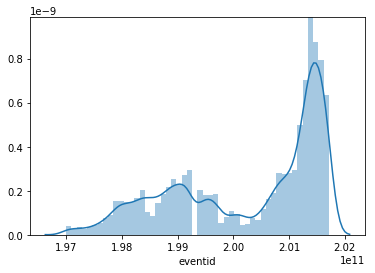

In [9]:
sns.distplot(mydata['eventid'])

In [11]:
print("Skewness: %f" % mydata['eventid'].skew())
print("Kurtosis: %f" % mydata['eventid'].kurt())

Skewness: -0.619155
Kurtosis: -1.042982


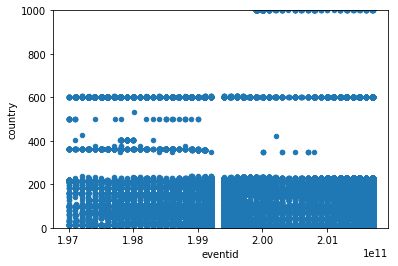

In [33]:
#relationship numerical features (scatter plot)
var = 'eventid'
data = pd.concat([mydata['country'], mydata[var]], axis=1)
data.plot.scatter(x=var, y='country' , ylim=(0,1000))

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text xticklabel objects>)

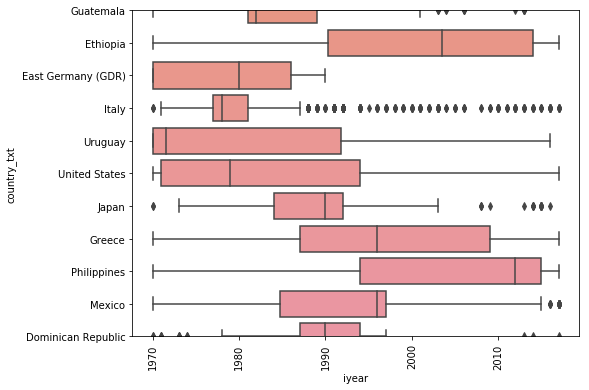

In [53]:
#relationship categorical features and outliers (boxplot)
var = 'iyear'
data = pd.concat([mydata['country_txt'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="country_txt", data=data)
fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90)


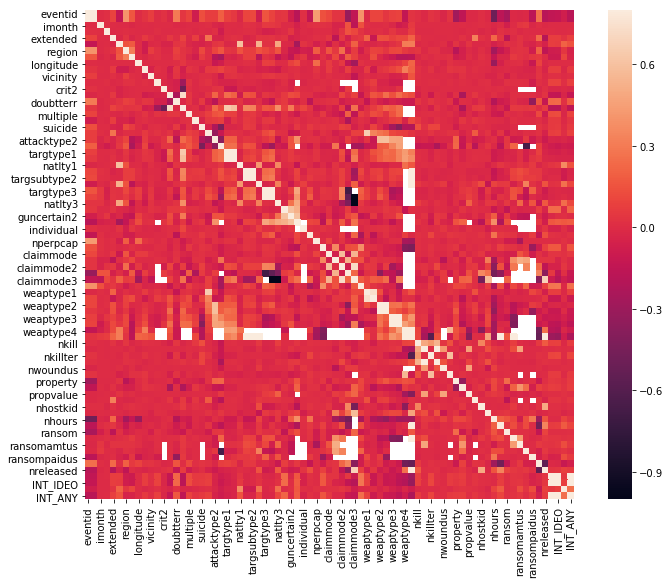

In [54]:
#correlation matrix
corrmat = mydata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

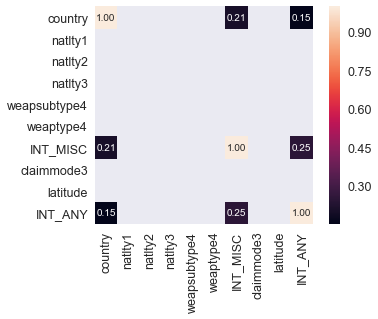

In [57]:
#correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'country')['country'].index
cm = np.corrcoef(mydata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

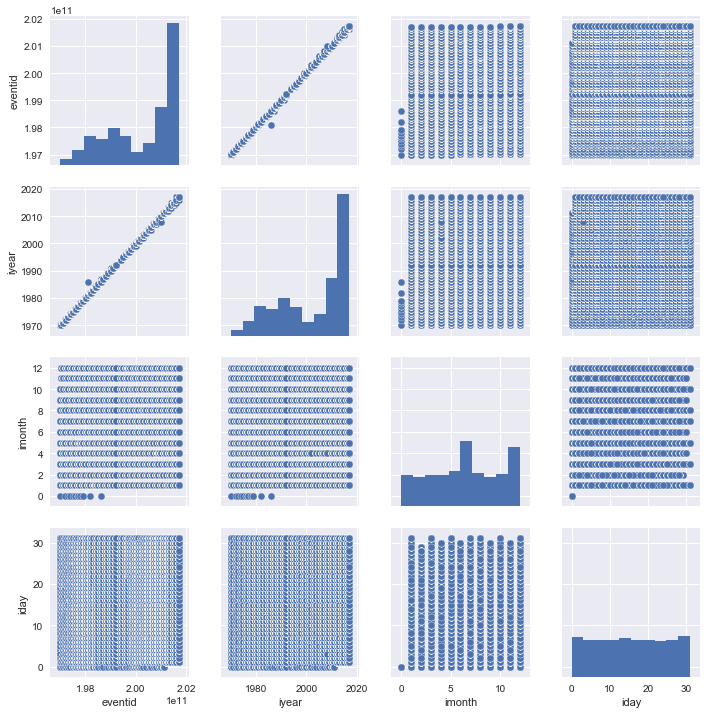

In [62]:
sns.set()
cols = ['eventid', 'iyear', 'imonth', 'iday']
sns.pairplot(mydata[cols], size = 2.5)
plt.show();